In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Concatenate, Dense, Input, LSTM, Embedding, Dropout, Activation, GRU, Flatten
from tensorflow.keras.layers import Bidirectional, GlobalAveragePooling1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Convolution1D
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import f1_score, precision_score, recall_score

In [3]:
import re
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


####Load data

In [5]:
def load_data(data_file, label_file):
    data = []
    with open(data_file) as f:
        for line in f:
            line = line.strip()
            row = line.split(',')
            row = [x.strip().strip('[').strip(']').strip() for x in row]
            row = [list(map(float, re.split('\s+', x))) for x in row]
            data.append(row)
    
    labels = []
    with open(label_file) as f:
        for line in f:
            line = line.strip()
            label = int(eval(line))
            labels.append(label)
    
    data = np.array(data, dtype='float32')
    labels = np.array(labels, dtype='int32')
    assert data.shape[0] == labels.shape[0]
    return data, labels


data_file = '/content/drive/MyDrive/Project/data.csv'
label_file = '/content/drive/MyDrive/Project/label.csv'
x1, y1 = load_data(data_file, label_file)
print('x1 shape:', x1.shape)
print('y1 shape:', y1.shape)

x1 shape: (849, 147, 4)
y1 shape: (849,)


In [6]:
def load_data(data_file, label_file):
    data = []
    with open(data_file) as f:
        for line in f:
            line = line.strip()
            row = line.split(',')
            row = [x.strip().strip('[').strip(']').strip() for x in row]
            row = [list(map(float, re.split('\s+', x))) for x in row]
            data.append(row)
    
    labels = []
    with open(label_file) as f:
        for line in f:
            line = line.strip()
            label = int(eval(line))
            labels.append(label)
    
    data = np.array(data, dtype='float32')
    labels = np.array(labels, dtype='int32')
    assert data.shape[0] == labels.shape[0]
    return data, labels


data_file = '/content/drive/MyDrive/Project/data_test.csv'
label_file = '/content/drive/MyDrive/Project/label_test.csv'
x2, y2 = load_data(data_file, label_file)
print('x2 shape:', x2.shape)
print('y2 shape:', y2.shape)

x2 shape: (546, 147, 4)
y2 shape: (546,)


In [33]:
#Load data test new
def load_data(data_file, label_file):
    data = []
    with open(data_file) as f:
        for line in f:
            line = line.strip()
            row = line.split(',')
            row = [x.strip().strip('[').strip(']').strip() for x in row]
            row = [list(map(float, re.split('\s+', x))) for x in row]
            data.append(row)
    
    labels = []
    with open(label_file) as f:
        for line in f:
            line = line.strip()
            label = int(eval(line))
            labels.append(label)
    
    data = np.array(data, dtype='float32')
    labels = np.array(labels, dtype='int32')
    assert data.shape[0] == labels.shape[0]
    return data, labels


data_file = '/content/drive/MyDrive/Project/data_test_new.csv'
label_file = '/content/drive/MyDrive/Project/label_test_new.csv'
x3, y3 = load_data(data_file, label_file)
print('x3 shape:', x3.shape)
print('y3 shape:', y3.shape)

x3 shape: (223, 147, 4)
y3 shape: (223,)


In [10]:
x = np.concatenate([x1, x2, x3], axis=0)
y = np.concatenate([y1, y2, y3], axis=0)
print(x.shape)
print(y.shape)

(1618, 147, 4)
(1618,)


In [11]:
cnt_0 = 0
cnt_1 = 0
for label in y:
  if label==0:
    cnt_0 += 1
  else:
    cnt_1 += 1
print(cnt_0)
print(cnt_1)

697
921


###Chuẩn hóa data

In [12]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import numpy as np

class MinMaxScaler3D(MinMaxScaler):

    def fit_transform(self, X, y=None):
        x = np.reshape(X, newshape=(X.shape[0]*X.shape[1], X.shape[2]))
        return np.reshape(super().fit_transform(x, y=y), newshape=X.shape)

In [13]:
scaler = MinMaxScaler3D()
x_scale = scaler.fit_transform(x)

In [14]:
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.1, shuffle=True)
x_train_val.shape, y_train_val.shape

((1456, 147, 4), (1456,))

In [15]:
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.1, shuffle=True, random_state=123)
x_train.shape, y_train.shape

((1310, 147, 4), (1310,))

In [34]:
x_train_scale = scaler.fit_transform(x_train)
x_val_scale = scaler.fit_transform(x_val)
x_test_scale = scaler.fit_transform(x_test)
#x_test_new_scale = scaler.fit_transform(x3)

####Tạo Model

###Dùng tọa độ bbox

In [17]:
from tensorflow.keras.layers import Dense, Lambda, Dot, Activation, Concatenate
from tensorflow.keras.layers import Layer, LeakyReLU


class Attention(Layer):

    def __init__(self, units=128, **kwargs):
        self.units = units
        super().__init__(**kwargs)

    def __call__(self, inputs):
        """
        Many-to-one attention mechanism for Keras.
        @param inputs: 3D tensor with shape (batch_size, time_steps, input_dim).
        @return: 2D tensor with shape (batch_size, 128)
        """
        hidden_states = inputs
        hidden_size = int(hidden_states.shape[2])
        # Inside dense layer
        #              hidden_states            dot               W            =>           score_first_part
        # (batch_size, time_steps, hidden_size) dot (hidden_size, hidden_size) => (batch_size, time_steps, hidden_size)
        # W is the trainable weight matrix of attention Luong's multiplicative style score
        score_first_part = Dense(hidden_size, use_bias=False, name='attention_score_vec')(hidden_states)
        #            score_first_part           dot        last_hidden_state     => attention_weights
        # (batch_size, time_steps, hidden_size) dot   (batch_size, hidden_size)  => (batch_size, time_steps)
        h_t = Lambda(lambda x: x[:, -1, :], output_shape=(hidden_size,), name='last_hidden_state')(hidden_states)
        score = Dot(axes=[1, 2], name='attention_score')([h_t, score_first_part])
        attention_weights = Activation('softmax', name='attention_weight')(score)
        # (batch_size, time_steps, hidden_size) dot (batch_size, time_steps) => (batch_size, hidden_size)
        context_vector = Dot(axes=[1, 1], name='context_vector')([hidden_states, attention_weights])
        pre_activation = Concatenate(name='attention_output')([context_vector, h_t])
        attention_vector = Dense(self.units, use_bias=False, activation='tanh', name='attention_vector')(pre_activation)
        return attention_vector

    def get_config(self):
        return {'units': self.units}

    @classmethod
    def from_config(cls, config):
        return cls(**config)

In [18]:
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import Callback, LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional, LeakyReLU
from tensorflow.keras.utils import plot_model

model = Sequential([              
      LSTM(units=100,input_shape=(147, 4), return_sequences=True),
      Dropout(0.2),
      LSTM(units=100,return_sequences=True),
      LSTM(units=100,return_sequences=True),
      Dropout(0.2),
      Attention(),
      #Dense(512),
      #LeakyReLU(),
      Dropout(0.2),
      Dense(1, activation='sigmoid'),
])

#Checkpoint
checkpoint = ModelCheckpoint('/content/drive/MyDrive/Project/model.h5',
                             monitor="val_f1_m",
                             verbose=1,
                             save_best_only=True,
                             mode='max')
callbacks = [checkpoint]
METRICS = [
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall'),
    f1_m,
]
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=METRICS,)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 147, 100)          42000     
_________________________________________________________________
dropout (Dropout)            (None, 147, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 147, 100)          80400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 147, 100)          80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 147, 100)          0         
_________________________________________________________________
last_hidden_state (Lambda)   (None, 100)               0         
_________________________________________________________________
attention_score_vec (Dense)  (None, 147, 100)          1

In [19]:
hist = model.fit(
    x_train_scale, y_train,
    batch_size=128,
    epochs=100,
    validation_data=(x_val_scale, y_val),
    verbose=1,
    callbacks=callbacks
)

Epoch 1/100
11/11 [==============================] - 13s 179ms/step - loss: 0.5044 - precision: 0.7138 - recall: 0.8632 - f1_m: 0.7572 - val_loss: 0.5121 - val_precision: 0.9762 - val_recall: 0.5467 - val_f1_m: 0.6857

Epoch 00001: val_f1_m improved from -inf to 0.68571, saving model to /content/drive/MyDrive/Project/model.h5
Epoch 2/100
11/11 [==============================] - 0s 43ms/step - loss: 0.3278 - precision: 0.8785 - recall: 0.8750 - f1_m: 0.8761 - val_loss: 0.2483 - val_precision: 0.9067 - val_recall: 0.9067 - val_f1_m: 0.8990

Epoch 00002: val_f1_m improved from 0.68571 to 0.89899, saving model to /content/drive/MyDrive/Project/model.h5
Epoch 3/100
11/11 [==============================] - 0s 35ms/step - loss: 0.2181 - precision: 0.9563 - recall: 0.8934 - f1_m: 0.9244 - val_loss: 0.2274 - val_precision: 0.9200 - val_recall: 0.9200 - val_f1_m: 0.9292

Epoch 00003: val_f1_m improved from 0.89899 to 0.92923, saving model to /content/drive/MyDrive/Project/model.h5
Epoch 4/100
11

In [35]:
model.load_weights('/content/drive/MyDrive/Project/model.h5')

In [21]:
score = model.evaluate(x_test_scale, y_test)

6/6 [==============================] - 0s 20ms/step - loss: 0.0191 - precision: 0.9885 - recall: 1.0000 - f1_m: 0.9933


In [22]:
y_pred = model.predict(x_test_scale)

In [23]:
threshold = 0.5
y_pred_label = []
for i in y_pred:
  if i < 0.5:
    y_pred_label.append(0)
  else:
    y_pred_label.append(1)
y_pred = np.array(y_pred_label)
y_pred

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1])

In [31]:
f1_score(y_test, y_pred)

0.9942196531791908

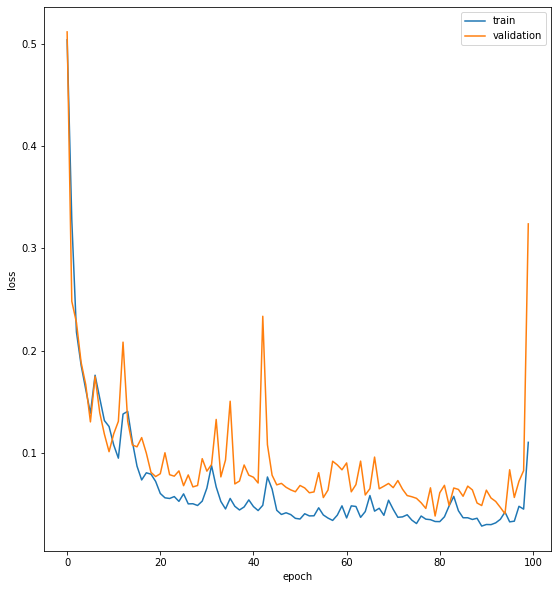

In [24]:
#plot
def plot_history(hist):
    plt.figure(figsize=(20, 10))
    plt.subplot(122)
    plt.plot(hist.epoch, hist.history['loss'], label='train')
    plt.plot(hist.epoch, hist.history['val_loss'], label='validation')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.show()
    


plot_history(hist)

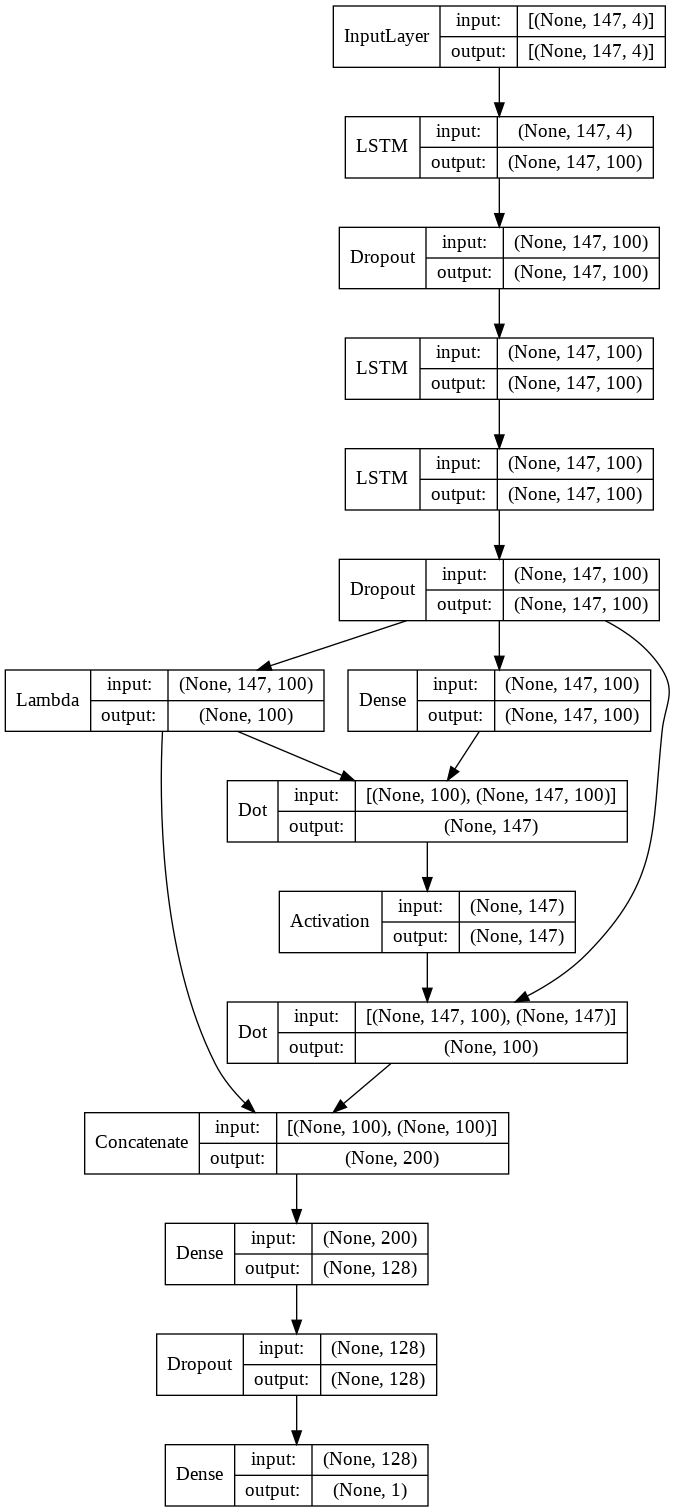

In [ ]:
plot_model(model,'model.png',show_shapes=True,show_layer_names=False)

In [25]:
#Kiểm tra trường hợp nhận diện sai
wrong_detect = []
number_test = 0
for sample in y_pred:
  if sample != y_test[number_test]:
    wrong_detect.append(number_test)
  number_test += 1

In [26]:
wrong_detect

[69]

In [29]:
y_test[69]

0

In [30]:
y_pred[69]

1

In [32]:
x_test[69]

array([[   0.   ,    0.   ,    0.   ,    0.   ],
       [   0.   ,    0.   ,    0.   ,    0.   ],
       [   0.   ,    0.   ,    0.   ,    0.   ],
       [   0.   ,    0.   ,    0.   ,    0.   ],
       [   0.   ,    0.   ,    0.   ,    0.   ],
       [   0.   ,    0.   ,    0.   ,    0.   ],
       [   0.   ,    0.   ,    0.   ,    0.   ],
       [   0.   ,    0.   ,    0.   ,    0.   ],
       [   0.   ,    0.   ,    0.   ,    0.   ],
       [   0.   ,    0.   ,    0.   ,    0.   ],
       [   0.   ,    0.   ,    0.   ,    0.   ],
       [   0.   ,    0.   ,    0.   ,    0.   ],
       [   0.   ,    0.   ,    0.   ,    0.   ],
       [   0.   ,    0.   ,    0.   ,    0.   ],
       [   0.   ,    0.   ,    0.   ,    0.   ],
       [   0.   ,    0.   ,    0.   ,    0.   ],
       [   0.   ,    0.   ,    0.   ,    0.   ],
       [   0.   ,    0.   ,    0.   ,    0.   ],
       [   0.   ,    0.   ,    0.   ,    0.   ],
       [   0.   ,    0.   ,    0.   ,    0.   ],
       [   0.   ,   

###Dùng tâm

In [ ]:
def load_data(data_file, label_file):
    data = []
    with open(data_file) as f:
        for line in f:
            line = line.strip()
            row = line.split(',')
            row = [x.strip().strip('[').strip(']').strip() for x in row]
            row = [list(map(float, re.split('\s+', x))) for x in row]
            data.append(row)
    
    labels = []
    with open(label_file) as f:
        for line in f:
            line = line.strip()
            label = int(eval(line))
            labels.append(label)
    
    data = np.array(data, dtype='float32')
    labels = np.array(labels, dtype='int32')
    assert data.shape[0] == labels.shape[0]
    return data, labels


data_file = '/content/drive/MyDrive/Project/data_central.csv'
label_file = '/content/drive/MyDrive/Project/label_central.csv'
x1, y1 = load_data(data_file, label_file)
print('x1 shape:', x1.shape)
print('y1 shape:', y1.shape)

x1 shape: (849, 147, 2)
y1 shape: (849,)


In [ ]:
def load_data(data_file, label_file):
    data = []
    with open(data_file) as f:
        for line in f:
            line = line.strip()
            row = line.split(',')
            row = [x.strip().strip('[').strip(']').strip() for x in row]
            row = [list(map(float, re.split('\s+', x))) for x in row]
            data.append(row)
    
    labels = []
    with open(label_file) as f:
        for line in f:
            line = line.strip()
            label = int(eval(line))
            labels.append(label)
    
    data = np.array(data, dtype='float32')
    labels = np.array(labels, dtype='int32')
    assert data.shape[0] == labels.shape[0]
    return data, labels


data_file = '/content/drive/MyDrive/Project/data_central_test.csv'
label_file = '/content/drive/MyDrive/Project/label_central_test.csv'
x2, y2 = load_data(data_file, label_file)
print('x2 shape:', x2.shape)
print('y2 shape:', y2.shape)

x2 shape: (546, 147, 2)
y2 shape: (546,)


In [ ]:
#Load data test new
def load_data(data_file, label_file):
    data = []
    with open(data_file) as f:
        for line in f:
            line = line.strip()
            row = line.split(',')
            row = [x.strip().strip('[').strip(']').strip() for x in row]
            row = [list(map(float, re.split('\s+', x))) for x in row]
            data.append(row)
    
    labels = []
    with open(label_file) as f:
        for line in f:
            line = line.strip()
            label = int(eval(line))
            labels.append(label)
    
    data = np.array(data, dtype='float32')
    labels = np.array(labels, dtype='int32')
    assert data.shape[0] == labels.shape[0]
    return data, labels


data_file = '/content/drive/MyDrive/Project/data_central_test_new.csv'
label_file = '/content/drive/MyDrive/Project/label_central_test_new.csv'
x3, y3 = load_data(data_file, label_file)
print('x3 shape:', x3.shape)
print('y3 shape:', y3.shape)

x3 shape: (223, 147, 2)
y3 shape: (223,)


In [ ]:
x = np.concatenate([x1, x2, x3], axis=0)
y = np.concatenate([y1, y2, y3], axis=0)
print(x.shape)
print(y.shape)

(1618, 147, 2)
(1618,)


In [ ]:
cnt_0 = 0
cnt_1 = 0
for i in y:
  if i == 0:
    cnt_0 += 1
  else:
    cnt_1 += 1
print(cnt_0)
print(cnt_1)

697
921


Xong bước load data cần quay lên thực hiện chuẩn hóa data trước khi build model

In [ ]:
from tensorflow.keras.layers import Dense, Lambda, Dot, Activation, Concatenate
from tensorflow.keras.layers import Layer, LeakyReLU


class Attention(Layer):

    def __init__(self, units=128, **kwargs):
        self.units = units
        super().__init__(**kwargs)

    def __call__(self, inputs):
        """
        Many-to-one attention mechanism for Keras.
        @param inputs: 3D tensor with shape (batch_size, time_steps, input_dim).
        @return: 2D tensor with shape (batch_size, 128)
        """
        hidden_states = inputs
        hidden_size = int(hidden_states.shape[2])
        # Inside dense layer
        #              hidden_states            dot               W            =>           score_first_part
        # (batch_size, time_steps, hidden_size) dot (hidden_size, hidden_size) => (batch_size, time_steps, hidden_size)
        # W is the trainable weight matrix of attention Luong's multiplicative style score
        score_first_part = Dense(hidden_size, use_bias=False, name='attention_score_vec')(hidden_states)
        #            score_first_part           dot        last_hidden_state     => attention_weights
        # (batch_size, time_steps, hidden_size) dot   (batch_size, hidden_size)  => (batch_size, time_steps)
        h_t = Lambda(lambda x: x[:, -1, :], output_shape=(hidden_size,), name='last_hidden_state')(hidden_states)
        score = Dot(axes=[1, 2], name='attention_score')([h_t, score_first_part])
        attention_weights = Activation('softmax', name='attention_weight')(score)
        # (batch_size, time_steps, hidden_size) dot (batch_size, time_steps) => (batch_size, hidden_size)
        context_vector = Dot(axes=[1, 1], name='context_vector')([hidden_states, attention_weights])
        pre_activation = Concatenate(name='attention_output')([context_vector, h_t])
        attention_vector = Dense(self.units, use_bias=False, activation='tanh', name='attention_vector')(pre_activation)
        return attention_vector

    def get_config(self):
        return {'units': self.units}

    @classmethod
    def from_config(cls, config):
        return cls(**config)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import Callback, LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional, LeakyReLU
from tensorflow.keras.utils import plot_model

model = Sequential([
      #Bidirectional(LSTM(units=100, return_sequences=True),input_shape=(147, 4)),              
      LSTM(units=100,input_shape=(147, 2), return_sequences=True),
      Dropout(0.2),
      LSTM(units=100,return_sequences=True),
      LSTM(units=100,return_sequences=True),
      Dropout(0.2),
      Attention(),
      #Dense(512),
      #LeakyReLU(),
      Dropout(0.2),
      Dense(1, activation='sigmoid'),
])

#Checkpoint
checkpoint = ModelCheckpoint('/content/drive/MyDrive/Project/model_central_new.h5',
                             monitor="val_f1_m",
                             verbose=1,
                             save_best_only=True,
                             mode='max')
callbacks = [checkpoint]
METRICS = [
    recall_m,
    precision_m,
    f1_m,
]
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=METRICS,)

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 147, 100)          41200     
_________________________________________________________________
dropout_12 (Dropout)         (None, 147, 100)          0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 147, 100)          80400     
_________________________________________________________________
lstm_14 (LSTM)               (None, 147, 100)          80400     
_________________________________________________________________
dropout_13 (Dropout)         (None, 147, 100)          0         
_________________________________________________________________
last_hidden_state (Lambda)   (None, 100)               0         
_________________________________________________________________
attention_score_vec (Dense)  (None, 147, 100)         

In [ ]:
hist = model.fit(
    x_train_scale, y_train,
    batch_size=128,
    epochs=100,
    validation_data=(x_val_scale, y_val),
    verbose=1,
    callbacks=callbacks
)

Epoch 1/100
11/11 [==============================] - 5s 137ms/step - loss: 0.5713 - recall_m: 0.8710 - precision_m: 0.6694 - f1_m: 0.7442 - val_loss: 0.2819 - val_recall_m: 0.8683 - val_precision_m: 0.9203 - val_f1_m: 0.8928

Epoch 00001: val_f1_m improved from -inf to 0.89278, saving model to /content/drive/MyDrive/Project/model_central_new.h5
Epoch 2/100
11/11 [==============================] - 0s 34ms/step - loss: 0.2695 - recall_m: 0.8859 - precision_m: 0.9010 - f1_m: 0.8916 - val_loss: 0.1902 - val_recall_m: 0.9462 - val_precision_m: 0.9603 - val_f1_m: 0.9531

Epoch 00002: val_f1_m improved from 0.89278 to 0.95312, saving model to /content/drive/MyDrive/Project/model_central_new.h5
Epoch 3/100
11/11 [==============================] - 0s 34ms/step - loss: 0.2368 - recall_m: 0.9062 - precision_m: 0.9453 - f1_m: 0.9239 - val_loss: 0.1582 - val_recall_m: 0.9692 - val_precision_m: 0.9919 - val_f1_m: 0.9803

Epoch 00003: val_f1_m improved from 0.95312 to 0.98031, saving model to /conten

In [ ]:
model.load_weights('/content/drive/MyDrive/Project/model_central_new.h5')

In [ ]:
#Đánh giá trên tập test
score = model.evaluate(x_test_scale, y_test)

6/6 [==============================] - 0s 16ms/step - loss: 0.0878 - recall_m: 0.9754 - precision_m: 1.0000 - f1_m: 0.9872


In [ ]:
y_pred = model.predict(x_test_scale)

In [ ]:
threshold = 0.5
y_pred_label = []
for i in y_pred:
  if i < 0.5:
    y_pred_label.append(0)
  else:
    y_pred_label.append(1)
y_pred = np.array(y_pred_label)
y_pred

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1])

In [ ]:
y_test

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1], dtype=int32)

In [ ]:
#Kiểm tra trường hợp nhận diện sai
wrong_detect = []
number_test = 0
for sample in y_pred:
  if sample != y_test[number_test]:
    wrong_detect.append(number_test)
  number_test += 1

In [ ]:
wrong_detect

[1, 102, 108]

In [ ]:
print(y_pred[1])
print(y_pred[102])
print(y_pred[108])

0
0
0


In [ ]:
print(y_test[1])
print(y_test[102])
print(y_test[108])

1
1
1


In [ ]:
x_test[1]

array([[  0.    ,   0.    ],
       [  0.    ,   0.    ],
       [  0.    ,   0.    ],
       [  0.    ,   0.    ],
       [  0.    ,   0.    ],
       [  0.    ,   0.    ],
       [  0.    ,   0.    ],
       [  0.    ,   0.    ],
       [  0.    ,   0.    ],
       [  0.    ,   0.    ],
       [  0.    ,   0.    ],
       [  0.    ,   0.    ],
       [  0.    ,   0.    ],
       [  0.    ,   0.    ],
       [  0.    ,   0.    ],
       [  0.    ,   0.    ],
       [  0.    ,   0.    ],
       [  0.    ,   0.    ],
       [  0.    ,   0.    ],
       [  0.    ,   0.    ],
       [  0.    ,   0.    ],
       [  0.    ,   0.    ],
       [  0.    ,   0.    ],
       [  0.    ,   0.    ],
       [  0.    ,   0.    ],
       [  0.    ,   0.    ],
       [  0.    ,   0.    ],
       [  0.    ,   0.    ],
       [  0.    ,   0.    ],
       [  0.    ,   0.    ],
       [  0.    ,   0.    ],
       [  0.    ,   0.    ],
       [  0.    ,   0.    ],
       [  0.    ,   0.    ],
       [  0.  

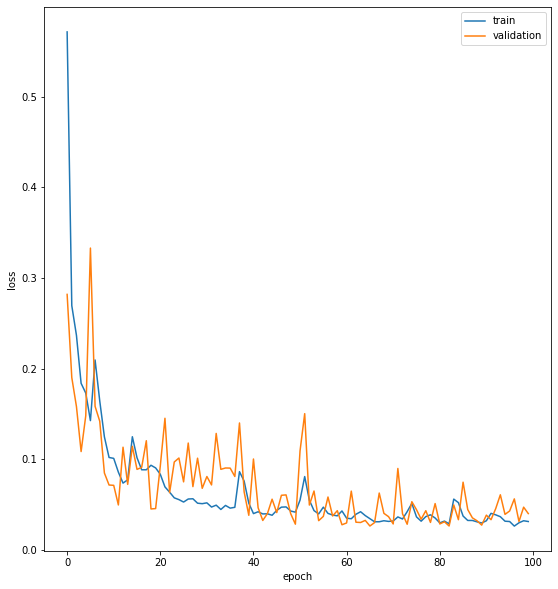

In [ ]:
#plot
def plot_history(hist):
    plt.figure(figsize=(20, 10))
    plt.subplot(122)
    plt.plot(hist.epoch, hist.history['loss'], label='train')
    plt.plot(hist.epoch, hist.history['val_loss'], label='validation')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.show()
    


plot_history(hist)